## Compare linear vs GP emulators

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
from matplotlib import cm
# our modules
import gp_emulator
import linear_emulator
import simplest_emulator
import likelihood

In [2]:
# option to subsample the redshifts, to make lighter emulators
undersample_z=3
# specify parameters to emulate
emulate_pressure=True
emulate_growth=False
emulate_running=False
paramList=None
#paramList=["mF","Delta2_p","sigT_Mpc","n_p","gamma","kF_Mpc"]

In [3]:
# setup likelihood with GP emulator
emu_polyGP=gp_emulator.PolyfitGPEmulator(undersample_z=undersample_z,paramList=paramList,kmax_Mpc=10,train=True)
like_polyGP=likelihood.Likelihood(emulator=emu_polyGP)

Rescaled params to unity volume
Training GP
Optimised
Note: redshifts have been re-sorted (earliest first)


In [4]:
# setup likelihood with GP emulator
emu_kGP=gp_emulator.GPEmulator(undersample_z=undersample_z,paramList=paramList,kmax_Mpc=10,train=True)
like_kGP=likelihood.Likelihood(emulator=emu_kGP)

Rescaled params to unity volume
Training GP
Optimised
Note: redshifts have been re-sorted (earliest first)


In [5]:
# setup likelihood with linear emulator
emu_lin=linear_emulator.LinearEmulator(undersample_z=undersample_z,emulate_running=emulate_running,
                                       emulate_pressure=emulate_pressure,emulate_growth=emulate_growth)
like_lin=likelihood.Likelihood(emulator=emu_lin)

setup interpolator for coefficient 0
[  0.33183234  -2.30000003   0.673892     0.14306836   1.45676361
  12.72440497] test [-1.15916055]
setup interpolator for coefficient 1
[  0.33183234  -2.30000003   0.673892     0.14306836   1.45676361
  12.72440497] test [-0.68242807]
setup interpolator for coefficient 2
[  0.33183234  -2.30000003   0.673892     0.14306836   1.45676361
  12.72440497] test [-0.28590414]
setup interpolator for coefficient 3
[  0.33183234  -2.30000003   0.673892     0.14306836   1.45676361
  12.72440497] test [-0.12371318]
setup interpolator for coefficient 4
[  0.33183234  -2.30000003   0.673892     0.14306836   1.45676361
  12.72440497] test [-0.02564652]
Note: redshifts have been re-sorted (earliest first)


In [6]:
# setup likelihood with simplest emulator
emu_NGP=simplest_emulator.SimplestEmulator(undersample_z=undersample_z)
like_NGP=likelihood.Likelihood(emulator=emu_NGP)

Note: redshifts have been re-sorted (earliest first)


In [8]:
# get measured bins from data
data=like_NGP.data
k_kms=data.k
zs=data.z
Nz=len(zs)

# ask emulator prediction for P1D in each bin
p1d_kGP = like_kGP.get_p1d_kms(k_kms)
p1d_polyGP = like_polyGP.get_p1d_kms(k_kms)
p1d_lin = like_lin.get_p1d_kms(k_kms)
p1d_NGP = like_NGP.get_p1d_kms(k_kms)

call emulator
call_1 [0.80075506629149329, 0.76380315935812015, 0.72386244653663134, 0.68128313361421189, 0.63649999999999995, 0.59002261543199974, 0.54242148309384153, 0.49431050026297613, 0.44632643256740512, 0.39910638229074491, 0.35326446365477432, 0.30936904859256836]
call_2 [0.55651130145771688, 0.49488568402750766, 0.44280074273630693, 0.39841920050635804, 0.36031650137680626, 0.32737728593655518, 0.29871954453855937, 0.27363948987419645, 0.25157064580159277, 0.23205325295753354, 0.2147112859742899, 0.19923499758542598]
2.2 < z < 4.4


<IPython.core.display.Javascript object>


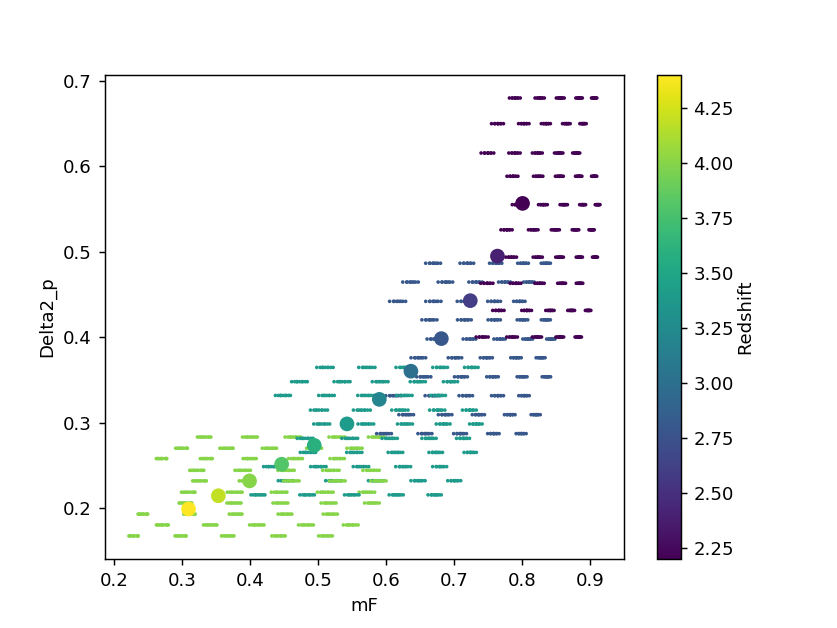

In [9]:
# compare the model we evaluate vs the entries in the archive
like_kGP.overplot_emulator_calls(param_1='mF',param_2='Delta2_p')

<IPython.core.display.Javascript object>


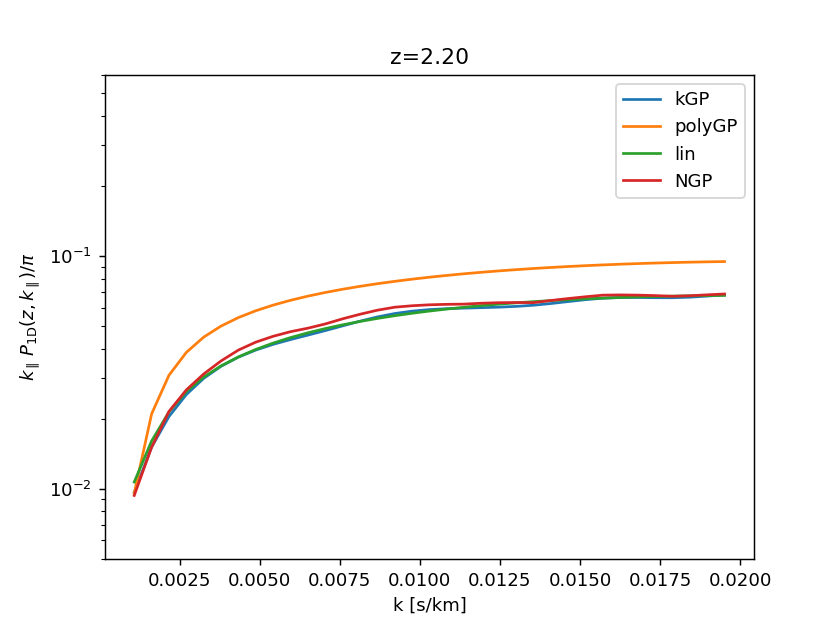

<IPython.core.display.Javascript object>


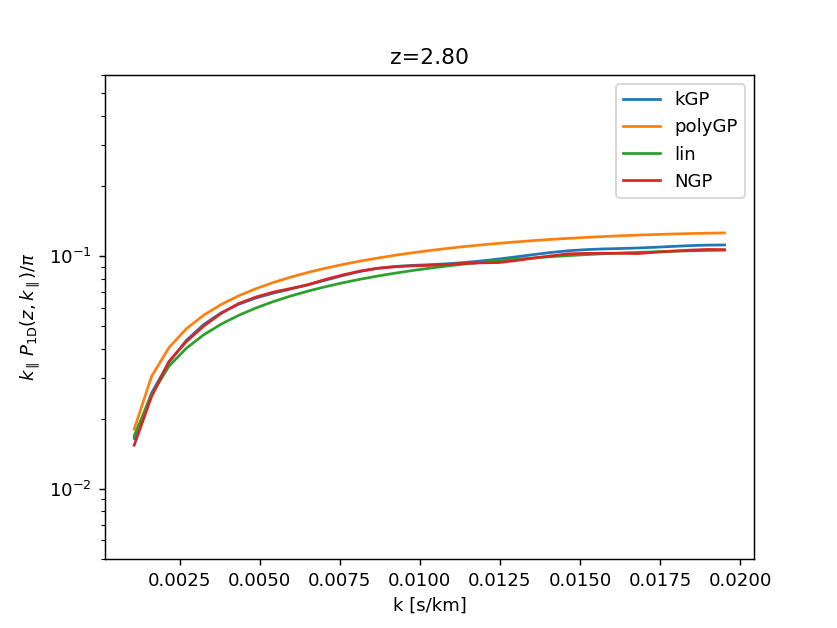

<IPython.core.display.Javascript object>


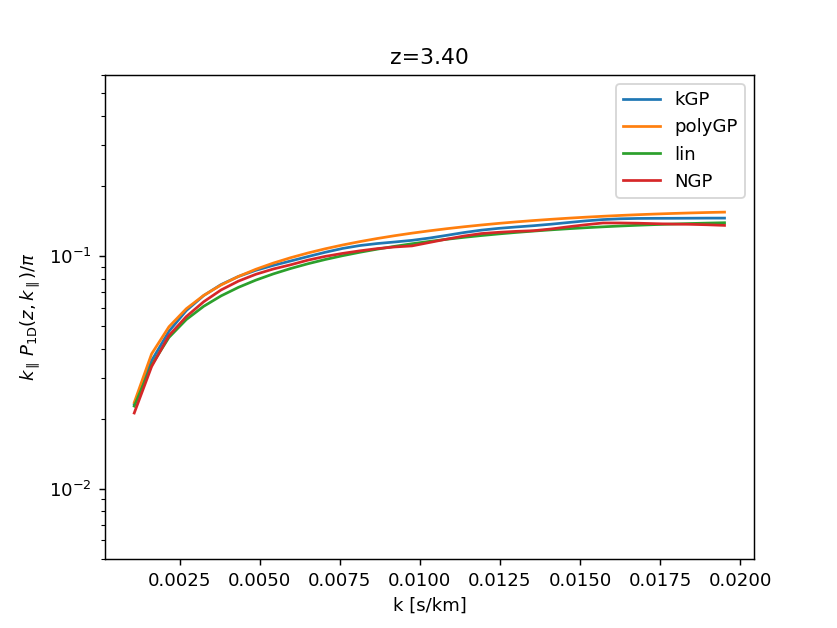

<IPython.core.display.Javascript object>


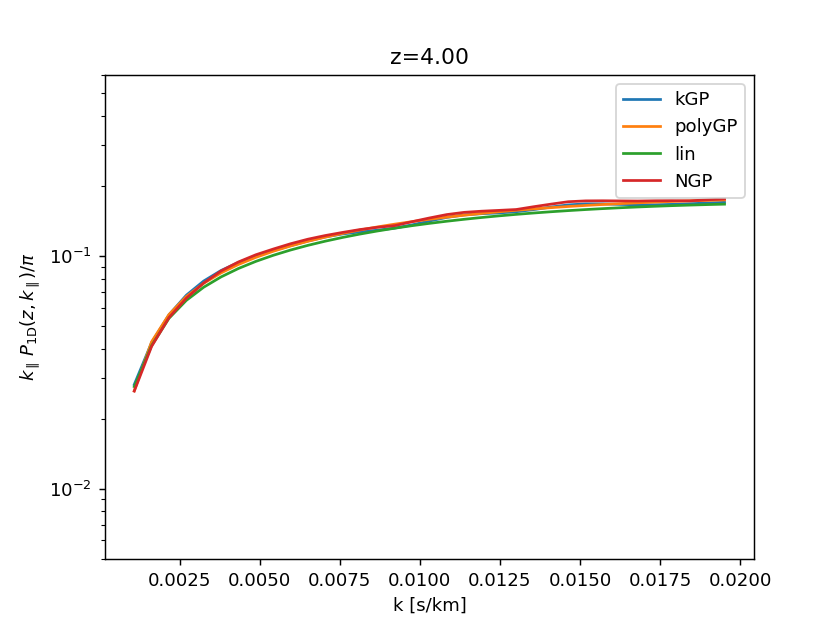

In [10]:
# plot only few redshifts for clarity
every_iz=3
plot_data=False
for iz in range(0,Nz,every_iz):
    # acess data for this redshift
    z=zs[iz]
    p1d_data=data.get_Pk_iz(iz)
    p1d_cov=data.get_cov_iz(iz)
    # predictions for this redshift
    p1d_kGP_iz=p1d_kGP[iz]
    p1d_polyGP_iz=p1d_polyGP[iz]
    p1d_lin_iz=p1d_lin[iz]
    p1d_NGP_iz=p1d_NGP[iz]
    if p1d_lin_iz is None:
        print(z,'linear emulator did not provide P1D')
        continue
    # plot everything
    plt.figure()
    if plot_data:
        plt.errorbar(k_kms,p1d_data*k_kms/np.pi,
                    yerr=np.sqrt(np.diag(p1d_cov))*k_kms/np.pi,label='mock data')
    plt.plot(k_kms,p1d_kGP_iz*k_kms/np.pi,label='kGP')
    plt.plot(k_kms,p1d_polyGP_iz*k_kms/np.pi,label='polyGP')
    plt.plot(k_kms,p1d_lin_iz*k_kms/np.pi,label='lin')
    plt.plot(k_kms,p1d_NGP_iz*k_kms/np.pi,label='NGP')
    plt.title('z=%.2f'%z)
    plt.yscale('log')
    plt.legend()
    plt.xlabel('k [s/km]')
    plt.ylabel(r'$k_\parallel \, P_{\rm 1D}(z,k_\parallel) / \pi$')
    plt.ylim(0.005,0.6)